In [33]:
#preprocessing images
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt



In [34]:
tf.keras.layers.experimental.RandomFourierFeatures

keras.layers.kernelized.RandomFourierFeatures

In [35]:
datagen = preprocessing.image.ImageDataGenerator(rescale=1/255)# normalisation
train_generator = datagen.flow_from_directory(
        '../datasets/spectrogram/train',
        batch_size=10,
        target_size=(512,512),
        class_mode='binary')
val_generator = datagen.flow_from_directory(
        '../datasets/spectrogram/test',
        color_mode='rgb',
        target_size=(512,512),
        class_mode='binary')


Found 120 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [38]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.experimental.RandomFourierFeatures(output_dim=10))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()])

Epoch 1/50
12/12 [==============================] - 11s 890ms/step - loss: 2.4644 - accuracy: 0.6917 - true_negatives_7: 46.0000 - true_positives_7: 37.0000 - false_negatives_7: 23.0000 - false_positives_7: 14.0000 - val_loss: 2.3688 - val_accuracy: 0.8125 - val_true_negatives_7: 25.0000 - val_true_positives_7: 40.0000 - val_false_negatives_7: 0.0000e+00 - val_false_positives_7: 15.0000
Epoch 2/50
12/12 [==============================] - 10s 795ms/step - loss: 2.4587 - accuracy: 0.6417 - true_negatives_7: 34.0000 - true_positives_7: 43.0000 - false_negatives_7: 17.0000 - false_positives_7: 26.0000 - val_loss: 2.3794 - val_accuracy: 0.8000 - val_true_negatives_7: 28.0000 - val_true_positives_7: 36.0000 - val_false_negatives_7: 4.0000 - val_false_positives_7: 12.0000
Epoch 3/50
12/12 [==============================] - 9s 789ms/step - loss: 2.3979 - accuracy: 0.6667 - true_negatives_7: 42.0000 - true_positives_7: 38.0000 - false_negatives_7: 22.0000 - false_positives_7: 18.0000 - val_loss

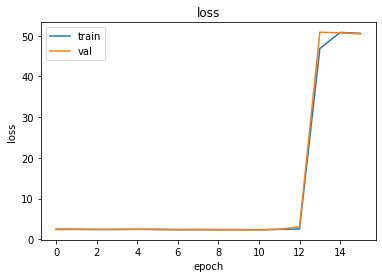

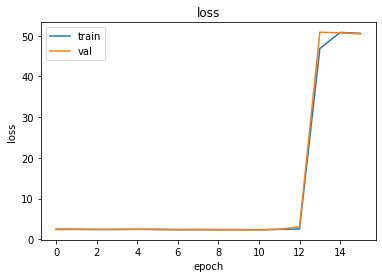

In [45]:
# fitiing
history=model.fit(train_generator,epochs=100,validation_data=val_generator,shuffle=True,
                            callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
#testing 
loss,accuracy,tn,tp,fn,fp=model.evaluate(val_generator)
print(accuracy)
print(tp,fp,)
print(fn,tp)

3/3 [==============================] - 1s 274ms/step - loss: 2.2789 - accuracy: 0.8125 - true_negatives_7: 25.0000 - true_positives_7: 40.0000 - false_negatives_7: 0.0000e+00 - false_positives_7: 15.0000
0.8125
40.0 15.0
0.0 40.0


In [47]:
loss,accuracy,tn,tp,fn,fp = model.evaluate(train_generator)
print(accuracy)
print(tp,fp,)
print(fn,tp)

12/12 [==============================] - 2s 138ms/step - loss: 2.2883 - accuracy: 0.7750 - true_negatives_7: 42.0000 - true_positives_7: 51.0000 - false_negatives_7: 9.0000 - false_positives_7: 18.0000
0.7749999761581421
51.0 18.0
9.0 51.0
